In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a8f0f0dd44c67317fb1e4cd99d9d4140


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

luderitz na
port hardy ca
busselton au
meulaboh id
albany au
bela pk
belushya guba ru
hobart au
deputatskiy ru
minna ng
saskylakh ru
potgietersrus za
acapulco mx
mataura pf
khovu-aksy ru
busselton au
mataura pf
atuona pf
mar del plata ar
mataura pf
bluff nz
ushuaia ar
mataura pf
punta arenas cl
taolanaro mg
hilo us
nanortalik gl
fort nelson ca
tuktoyaktuk ca
longyearbyen sj
carauari br
cidreira br
sao joao da barra br
kimbe pg
bereda so
gizo sb
avarua ck
maryborough au
saint george bm
olafsvik is
kpalime tg
punta arenas cl
chuy uy
qaanaaq gl
borovskoy kz
mataura pf
tromso no
sunrise manor us
ola ru
souillac mu
upernavik gl
san quintin mx
ushuaia ar
saint-philippe re
mataura pf
rostovka ru
uk ru
ilulissat gl
atuona pf
rikitea pf
busselton au
la seyne-sur-mer fr
port lincoln au
carnot cf
yaan cn
kudahuvadhoo mv
kapaa us
ayan ru
mataura pf
rikitea pf
sentyabrskiy ru
chumphon th
kurilsk ru
tsiroanomandidy mg
busselton au
mahebourg mu
arraial do cabo br
barrow us
hithadhoo mv
talnakh ru
rik

tomatlan mx
chokurdakh ru
mataura pf
tessalit ml
tres arroyos ar
laguna br
kruisfontein za
maxixe mz
satitoa ws
geraldton au
saint-philippe re
hudson bay ca
zhicheng cn
ushuaia ar
busselton au
thompson ca
nanortalik gl
amderma ru
chuy uy
saskylakh ru
ushuaia ar
mys shmidta ru
ushuaia ar
lagoa pt
carnarvon au
punta arenas cl
punta arenas cl
vaini to
taolanaro mg
belushya guba ru
negele et
dauphin ca
severo-kurilsk ru
hobart au
lolua tv
esperance au
busselton au
rikitea pf
san cristobal ec
hualmay pe
airai pw
ilanskiy ru
tezu in
cape town za
vaini to
rikitea pf
zamhlay ua
atuona pf
amapa br
estevan ca
dikson ru
illela ne
hilo us
qaanaaq gl
jamestown sh
trincomalee lk
saldanha za
nizhneyansk ru
khasan ru
airai pw
bayanday ru
rach gia vn
hermanus za
mar del plata ar
rikitea pf
kaitangata nz
pisco pe
tiruvottiyur in
kodiak us
sumbawa id
busselton au
ribeira grande pt
cockburn town tc
cape town za
victoria sc
saint-philippe re
punta arenas cl
mataura pf
barrow us
sentyabrskiy ru
celestun mx


samusu ws
hobart au
vaini to
ushuaia ar
bengkulu id
iqaluit ca
severo-kurilsk ru
hermanus za
provideniya ru
mandurah au
lompoc us
maniitsoq gl
thompson ca
georgetown sh
lagoa pt
mataura pf
girne cy
sayville us
illoqqortoormiut gl
cherskiy ru
jamestown sh
ucluelet ca
mataura pf
khatanga ru
arraial do cabo br
palmer us
toliary mg
rio gallegos ar
binzhou cn
moron mn
reinosa es
jamestown sh
bluff nz
albany au
newport us
sao filipe cv
crab hill bb
new norfolk au
marienburg sr
iqaluit ca
klaksvik fo
rikitea pf
ribeira grande pt
airai pw
jamestown sh
hobart au
sheregesh ru
albany au
mae chan th
louisbourg ca
nishihara jp
sao joao da barra br
karauzyak uz
chokurdakh ru
albany au
kodiak us
saint george bm
albany au
longyearbyen sj
luderitz na
hobart au
busselton au
kambove cd
east london za
jamestown sh
hobart au
martapura id
falakata in
lagoa pt
pilao arcado br
rehoboth na
busselton au
the valley ai
lagoa pt
sentyabrskiy ru
flinders au
longyearbyen sj
hokitika nz
kimbe pg
chapais ca
kemi fi
ox

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | luderitz
Processing Record 2 of Set 1 | port hardy
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | meulaboh
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | bela
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | deputatskiy
Processing Record 10 of Set 1 | minna
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | potgietersrus
City not found. Skipping...
Processing Record 13 of Set 1 | acapulco
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | khovu-aksy
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | taolanaro
City not found. Skipp

Processing Record 36 of Set 4 | trat
Processing Record 37 of Set 4 | santa rosa
Processing Record 38 of Set 4 | beckley
Processing Record 39 of Set 4 | weyburn
Processing Record 40 of Set 4 | bemidji
Processing Record 41 of Set 4 | ketchikan
Processing Record 42 of Set 4 | kuche
City not found. Skipping...
Processing Record 43 of Set 4 | terrace
Processing Record 44 of Set 4 | bure
Processing Record 45 of Set 4 | nikolskoye
Processing Record 46 of Set 4 | port alfred
Processing Record 47 of Set 4 | pachino
Processing Record 48 of Set 4 | alta floresta
Processing Record 49 of Set 4 | necochea
Processing Record 50 of Set 4 | poronaysk
Processing Record 1 of Set 5 | marquette
Processing Record 2 of Set 5 | pinotepa nacional
Processing Record 3 of Set 5 | khatanga
Processing Record 4 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 5 | mayo
Processing Record 6 of Set 5 | zonalnoye
City not found. Skipping...
Processing Record 7 of Set 5 | kamenskoye


Processing Record 25 of Set 8 | pisco
Processing Record 26 of Set 8 | tiruvottiyur
City not found. Skipping...
Processing Record 27 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 28 of Set 8 | cockburn town
Processing Record 29 of Set 8 | celestun
Processing Record 30 of Set 8 | arvika
Processing Record 31 of Set 8 | desna
Processing Record 32 of Set 8 | cazaje
City not found. Skipping...
Processing Record 33 of Set 8 | kamenka
Processing Record 34 of Set 8 | rovaniemi
Processing Record 35 of Set 8 | tazmalt
Processing Record 36 of Set 8 | beasain
Processing Record 37 of Set 8 | richards bay
Processing Record 38 of Set 8 | mount gambier
Processing Record 39 of Set 8 | woodstock
Processing Record 40 of Set 8 | ballina
Processing Record 41 of Set 8 | campbell river
Processing Record 42 of Set 8 | mossendjo
Processing Record 43 of Set 8 | ayagoz
Processing Record 44 of Set 8 | puerto narino
Processing Record 45 of Set 8 | halifax
Processing Record 46 of Set 8 | varhaug
P

Processing Record 14 of Set 12 | russell
Processing Record 15 of Set 12 | masvingo
Processing Record 16 of Set 12 | bulgan
Processing Record 17 of Set 12 | flin flon
Processing Record 18 of Set 12 | padang
Processing Record 19 of Set 12 | panzhihua
Processing Record 20 of Set 12 | nuuk
Processing Record 21 of Set 12 | taburao
City not found. Skipping...
Processing Record 22 of Set 12 | santa isabel do rio negro
Processing Record 23 of Set 12 | rawson
Processing Record 24 of Set 12 | jos
Processing Record 25 of Set 12 | altay
Processing Record 26 of Set 12 | kirovsk
Processing Record 27 of Set 12 | gerede
Processing Record 28 of Set 12 | cherechiu
Processing Record 29 of Set 12 | touros
Processing Record 30 of Set 12 | tiznit
Processing Record 31 of Set 12 | san rafael del sur
Processing Record 32 of Set 12 | aykhal
Processing Record 33 of Set 12 | high level
Processing Record 34 of Set 12 | vao
Processing Record 35 of Set 12 | walvis bay
Processing Record 36 of Set 12 | san alberto
Pro

In [10]:
len(city_data)


569

In [11]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Luderitz,-26.6481,15.1594,81.25,54,97,10.00,NA,2022-01-22 23:36:48
1,Port Hardy,50.6996,-127.4199,42.98,81,75,8.05,CA,2022-01-22 23:36:49
2,Busselton,-33.6500,115.3333,80.42,40,3,5.77,AU,2022-01-22 23:36:49
3,Meulaboh,4.1363,96.1285,75.34,87,40,3.51,ID,2022-01-22 23:36:50
4,Albany,42.6001,-73.9662,19.67,68,80,2.66,US,2022-01-22 23:36:42
5,Bela,25.9333,81.9833,54.25,78,57,10.33,IN,2022-01-22 23:36:50
6,Hobart,-42.8794,147.3294,83.01,52,0,5.75,AU,2022-01-22 23:36:51
7,Deputatskiy,69.3000,139.9000,-8.45,96,100,4.83,RU,2022-01-22 23:36:51
8,Minna,9.6139,6.5569,78.51,18,3,25.32,NG,2022-01-22 23:36:52
9,Saskylakh,71.9167,114.0833,0.72,98,97,4.63,RU,2022-01-22 23:36:52


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Luderitz,NA,2022-01-22 23:36:48,-26.6481,15.1594,81.25,54,97,10.00
1,Port Hardy,CA,2022-01-22 23:36:49,50.6996,-127.4199,42.98,81,75,8.05
2,Busselton,AU,2022-01-22 23:36:49,-33.6500,115.3333,80.42,40,3,5.77
3,Meulaboh,ID,2022-01-22 23:36:50,4.1363,96.1285,75.34,87,40,3.51
4,Albany,US,2022-01-22 23:36:42,42.6001,-73.9662,19.67,68,80,2.66


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1642895579.8822982

In [16]:
today = time.strftime('%x')

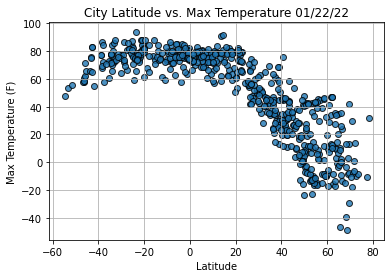

In [17]:
#build scatter plot for latitude vs. max temp
plt.scatter(lats, 
            max_temps, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

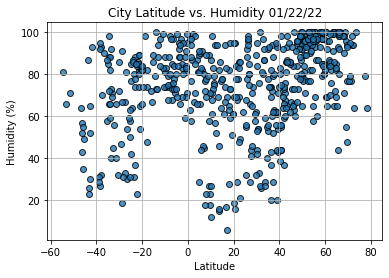

In [19]:
#build scatter plot for latitude vs. humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

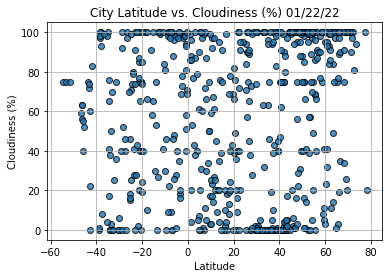

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

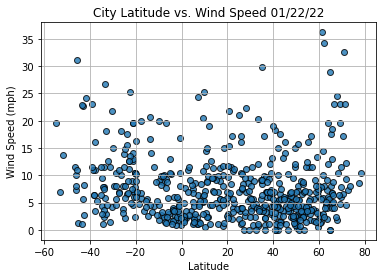

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()